
_____________________________________________________________________________________________________________________
#### LIBRARIES

In [32]:
import tweepy as tw
import pandas as pd
import time
import tweepy
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download()
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob




_______________________________________________________________________
#### KEYS AND ACCESS

In [34]:
CONSUMER_KEY = 'r01r2bfCABaDUQrJBE5DPMad5'
CONSUMER_SECRET = 'SWdv2zhaMFuGKASpI9lHZmxPoQtuaOIVixMtpBW8GqCOzTc2oS'
ACCESS_KEY = '1578317341691109378-GDFPDgNtjPu2VTieOvLHe9ChHwWqZA'
ACCESS_SECRET = 'Pq6uNnKwwGjSDP38tzlaLclRVTrMkycbpp9ImvOuCuMjH'
auth = tw.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
api = tw.API(auth, wait_on_rate_limit=True)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)

____________________________________________________________

#### DOWNLOAD TWEETS

In [75]:
search_query = '"paquete perdido"'
tweets = tw.Cursor(api.search_tweets,
              q=search_query,
              lang="es",
              since="2022-01-01").items(100000)
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
print("Total Tweets fetched:", len(tweets_copy))

Unexpected parameter: since
Unexpected parameter: since


Total Tweets fetched: 15


In [76]:
dfprueba = pd.DataFrame()
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    dfprueba = dfprueba.append(pd.DataFrame({'user_name': tweet.user.name, 
                                             'screen_name': tweet.user.screen_name,
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'id': tweet.id,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    dfprueba = dfprueba.reset_index(drop=True)
dfprueba.head()

,user_name,screen_name,user_location,user_description,user_verified,date,id,text,hashtags,source
0,@quedicemonty,albertomontoya2,,Yo levanté las manos cuando Goku lo necesitaba...,False,2022-10-13 08:15:00+00:00,1580472154658783232,Que vegüenza @CorreosExpress desde el viernes ...,None,Twitter for iPhone
1,Miguel Angel Ortega de la rosa,MiguelA7812754,,,False,2022-10-12 13:34:06+00:00,1580190071684153345,@estafeta reporte 9346007 @PayPalMexico como e...,None,Twitter Web App
2,El Zeta,ElZeta34264050,,Nada que decir... las acciones son las que hab...,False,2022-10-11 18:59:24+00:00,1579909548957388801,@StarkenCL @24HorasTVN @meganoticiascl @SERNAC...,[starken],Twitter for Android
3,.,rafrag11,,,False,2022-10-11 14:51:25+00:00,1579847140846993411,"@CorreosAtiende es una vergüenza, os escribo y...",None,Twitter for Android
4,Fransy Guerrero,Fransy13,Montefrío (Granada),Canción 26. Guía turístico. BookBlogger. Blas ...,False,2022-10-11 11:14:32+00:00,1579792563292499969,pero sino paquete perdido🙄. Lleva allí desde a...,None,Twitter Web App


In [77]:
dftodo = pd.read_csv('dftodo.csv')
dftodo = dftodo.append(dfprueba)
dftodo.to_csv('dftodo.csv', index=False)

In [43]:
patata = pd.read_csv('dftodo.csv')

In [45]:
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
dftodo['Cleaned Reviews'] = dftodo['text'].apply(clean)
dftodo.head()

,user_name,screen_name,user_location,user_description,user_verified,date,id,text,hashtags,source,Cleaned Reviews
0,"`*•.¸,¤°´.｡.:* Yelena *.:｡.`°¤,¸.•*´¯",shinemaker_,NaN,puedo arreglarlo!!! - //rp acc by: @v1ka__,False,2022-10-12 21:57:50+00:00,1580316839644901376,@risadetormenta respuesta para todo y eso le p...,NaN,Twitter for Android,risadetormenta respuesta para todo y eso le p...
1,TK HelpDesk,TK_HelpDesk,Türkiye,Welcome to @turkishairlines Customer Support! ...,True,2022-10-12 20:14:43+00:00,1580290892950167552,@aguerobartolome Por favor enviame los detalle...,NaN,Qualtrics Social Connect,aguerobartolome Por favor enviame los detalle...
2,Metro de Madrid,metro_madrid,"Madrid, España",Metro de Madrid es la empresa pública que gest...,True,2022-10-12 13:30:54+00:00,1580189268068036609,@_mariogomez10 Puedes entregarlo en cualquier ...,NaN,TweetDeck,mariogomez Puedes entregarlo en cualquier est...
3,Alsa,Alsa_autobuses,España,"Perfil oficial de Alsa para conocer novedades,...",True,2022-10-12 13:24:25+00:00,1580187634311184384,"@isantropia Hola Isa, sentimos lo ocurrido. Po...",NaN,Qualtrics Social Connect,isantropia Hola Isa sentimos lo ocurrido Por ...
4,Ángeles Jurado,Angeles_Jurado,"Gran Canaria, Spain",Periodista. @CasaAfrica @Africanoes1pais. Madr...,False,2022-10-12 12:41:49+00:00,1580176915453063168,"Hola, @AirEuropa, necesitamos un correo electr...",NaN,Twitter Web App,Hola AirEuropa necesitamos un correo electr ni...


In [47]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
         newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

In [48]:
dftodo['POS'] = dftodo['Cleaned Reviews'].apply(token_stop_pos)
dftodo

,user_name,screen_name,user_location,user_description,user_verified,date,id,text,hashtags,source,Cleaned Reviews,POS
0,"`*•.¸,¤°´.｡.:* Yelena *.:｡.`°¤,¸.•*´¯",shinemaker_,NaN,puedo arreglarlo!!! - //rp acc by: @v1ka__,False,2022-10-12 21:57:50+00:00,1580316839644901376,@risadetormenta respuesta para todo y eso le p...,NaN,Twitter for Android,risadetormenta respuesta para todo y eso le p...,"[(risadetormenta, n), (respuesta, n), (para, n..."
1,TK HelpDesk,TK_HelpDesk,Türkiye,Welcome to @turkishairlines Customer Support! ...,True,2022-10-12 20:14:43+00:00,1580290892950167552,@aguerobartolome Por favor enviame los detalle...,NaN,Qualtrics Social Connect,aguerobartolome Por favor enviame los detalle...,"[(aguerobartolome, a), (Por, n), (favor, n), (..."
2,Metro de Madrid,metro_madrid,"Madrid, España",Metro de Madrid es la empresa pública que gest...,True,2022-10-12 13:30:54+00:00,1580189268068036609,@_mariogomez10 Puedes entregarlo en cualquier ...,NaN,TweetDeck,mariogomez Puedes entregarlo en cualquier est...,"[(mariogomez, n), (Puedes, n), (entregarlo, n)..."
3,Alsa,Alsa_autobuses,España,"Perfil oficial de Alsa para conocer novedades,...",True,2022-10-12 13:24:25+00:00,1580187634311184384,"@isantropia Hola Isa, sentimos lo ocurrido. Po...",NaN,Qualtrics Social Connect,isantropia Hola Isa sentimos lo ocurrido Por ...,"[(isantropia, n), (Hola, n), (Isa, n), (sentim..."
4,Ángeles Jurado,Angeles_Jurado,"Gran Canaria, Spain",Periodista. @CasaAfrica @Africanoes1pais. Madr...,False,2022-10-12 12:41:49+00:00,1580176915453063168,"Hola, @AirEuropa, necesitamos un correo electr...",NaN,Twitter Web App,Hola AirEuropa necesitamos un correo electr ni...,"[(Hola, n), (AirEuropa, n), (necesitamos, None..."
...,...,...,...,...,...,...,...,...,...,...,...,...
12,A.M,aaaia_a,Costa Rica,=,False,2022-10-08 17:32:50+00:00,1578800599923294211,"Esto de los AirTags está súper practico, pero ...",None,Twitter Web App,Esto de los AirTags est s per practico pero qu...,"[(Esto, n), (de, None), (los, None), (AirTags,..."
13,Yaz Grant:),BrookYaz,,holiii.,False,2022-10-07 00:39:08+00:00,1578183108288839683,"2 ambulancias, 5 policías, 2 interrupciones ...",None,Twitter for Android,ambulancias polic as interrupciones cartera p...,"[(ambulancias, r), (polic, a), (interrupciones..."
14,H,WiltingHBR,Asturias,La felicidad consiste en la distracción.\n\nAg...,False,2022-10-06 06:36:47+00:00,1577910725737070593,No puedo sentirme desgraciade porque ha sido l...,None,Twitter for Android,No puedo sentirme desgraciade porque ha sido l...,"[(puedo, a), (sentirme, n), (desgraciade, n), ..."
15,Ángel sin alas,angxl22,,Si eres un facha ni te molestes en meterte en ...,False,2022-10-05 20:42:10+00:00,1577761084131495937,El cabron que se ha encontrado mi cartera perd...,None,Twitter for iPhone,El cabron que se ha encontrado mi cartera perd...,"[(El, n), (cabron, n), (que, n), (se, n), (ha,..."


In [49]:
wordnet_lemmatizer = WordNetLemmatizer()

In [50]:
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [51]:
dftodo['Lemma'] = dftodo['POS'].apply(lemmatize)
dftodo.head()

,user_name,screen_name,user_location,user_description,user_verified,date,id,text,hashtags,source,Cleaned Reviews,POS,Lemma
0,"`*•.¸,¤°´.｡.:* Yelena *.:｡.`°¤,¸.•*´¯",shinemaker_,NaN,puedo arreglarlo!!! - //rp acc by: @v1ka__,False,2022-10-12 21:57:50+00:00,1580316839644901376,@risadetormenta respuesta para todo y eso le p...,NaN,Twitter for Android,risadetormenta respuesta para todo y eso le p...,"[(risadetormenta, n), (respuesta, n), (para, n...",risadetormenta respuesta para todo eso le po...
1,TK HelpDesk,TK_HelpDesk,Türkiye,Welcome to @turkishairlines Customer Support! ...,True,2022-10-12 20:14:43+00:00,1580290892950167552,@aguerobartolome Por favor enviame los detalle...,NaN,Qualtrics Social Connect,aguerobartolome Por favor enviame los detalle...,"[(aguerobartolome, a), (Por, n), (favor, n), (...",aguerobartolome Por favor enviame los detall...
2,Metro de Madrid,metro_madrid,"Madrid, España",Metro de Madrid es la empresa pública que gest...,True,2022-10-12 13:30:54+00:00,1580189268068036609,@_mariogomez10 Puedes entregarlo en cualquier ...,NaN,TweetDeck,mariogomez Puedes entregarlo en cualquier est...,"[(mariogomez, n), (Puedes, n), (entregarlo, n)...",mariogomez Puedes entregarlo en cualquier es...
3,Alsa,Alsa_autobuses,España,"Perfil oficial de Alsa para conocer novedades,...",True,2022-10-12 13:24:25+00:00,1580187634311184384,"@isantropia Hola Isa, sentimos lo ocurrido. Po...",NaN,Qualtrics Social Connect,isantropia Hola Isa sentimos lo ocurrido Por ...,"[(isantropia, n), (Hola, n), (Isa, n), (sentim...",isantropia Hola Isa sentimos lo ocurrido Por...
4,Ángeles Jurado,Angeles_Jurado,"Gran Canaria, Spain",Periodista. @CasaAfrica @Africanoes1pais. Madr...,False,2022-10-12 12:41:49+00:00,1580176915453063168,"Hola, @AirEuropa, necesitamos un correo electr...",NaN,Twitter Web App,Hola AirEuropa necesitamos un correo electr ni...,"[(Hola, n), (AirEuropa, n), (necesitamos, None...",Hola AirEuropa necesitamos un correo electr ...


In [53]:
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

In [54]:
def analysis(score):
    if score < 0.5:
        return 'Negative'
    elif score == 0.5:
        return 'Neutral'
    else:
        return 'Positive'

In [55]:
findf = pd.DataFrame(dftodo[['text', 'Lemma']])
findf

,text,Lemma
0,@risadetormenta respuesta para todo y eso le p...,risadetormenta respuesta para todo eso le po...
1,@aguerobartolome Por favor enviame los detalle...,aguerobartolome Por favor enviame los detall...
2,@_mariogomez10 Puedes entregarlo en cualquier ...,mariogomez Puedes entregarlo en cualquier es...
3,"@isantropia Hola Isa, sentimos lo ocurrido. Po...",isantropia Hola Isa sentimos lo ocurrido Por...
4,"Hola, @AirEuropa, necesitamos un correo electr...",Hola AirEuropa necesitamos un correo electr ...
...,...,...
12,"Esto de los AirTags está súper practico, pero ...",Esto de los AirTags est per practico pero qu...
13,"2 ambulancias, 5 policías, 2 interrupciones ...",ambulancias polic interrupciones cartera per...
14,No puedo sentirme desgraciade porque ha sido l...,puedo sentirme desgraciade porque ha sido li...
15,El cabron que se ha encontrado mi cartera perd...,El cabron que se ha encontrado mi cartera pe...


<AxesSubplot:>

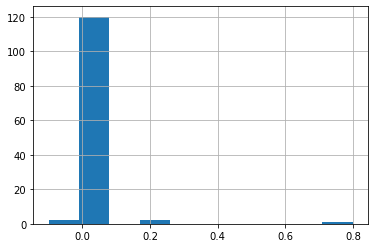

In [56]:
findf['Polarity'] = findf['Lemma'].apply(getPolarity) 
findf['Analysis'] = findf['Polarity'].apply(analysis)
findf['Polarity'].hist()


In [71]:
fcvgbhnj= findf.loc[findf['Polarity'] == 0.2]
fcvgbhnj['text'].unique()

array(['@marcecontrerasc Cachai que me acaba de llegar un correo diciéndome que debo llenar una solicitud en papel para recuperar el objeto perdido hahahahaha. Si de ahora en más donde mis ojos lo vean',
       '@Iberia Tratáis de dar una compensación de 213 euros que para nada se corresponde con lo que sería legal por maleta perdida (más de mil euros) mas el bono diario para realizar compras básicas los días que estuve en Marruecos sin maleta.'],
      dtype=object)

In [22]:
# for i in range(len(dfprueba)):
#   print(str(dfprueba.iloc[i]['id']))
#   api.update_status(status='@'+ dfprueba.iloc[i]['screen_name'] + ' pruebita final!', in_reply_to_status_id=dfprueba.iloc[i]['id'].astype(str))